In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from numpy.polynomial.polynomial import polyfit

In [ ]:
pd.options.display.max_columns=1000
pd.options.display.max_rows=1000

In [ ]:
path='drive/My Drive/Datasets/runoff/'

In [ ]:
df=pd.read_excel(path+'runoff_data.xlsx')

In [ ]:
df.head()

,Date,Treatment,rainfall,I30,I1,KE,E,runoff,erosion,OC_sediment,N_sediment,P_sediment,OC_total,N_total,P_total,EROC,ER_N,ER_P,clayd,siltd,sandd,claye,silte,sande,MWDd,MWDe,ERclay,ERsilt,ERsand
0,2010-01-12,Almond monocrop with intense tillage,20.2,4.4,3.6,0.17,0.74,0.10,0.04,2.05,0.19,28.64,0.00,0.0,0.00,0.78,0.93,0.56,9.51,25.52,64.98,1.44,13.22,85.31,591.72,831.71,0.53,0.52,1.96
1,2010-01-12,Almond monocrop with reduced tillage,20.2,4.4,3.6,0.17,0.74,0.14,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.34,18.51,75.16,3.07,46.99,49.92,694.21,93.14,0.36,0.38,2.26
2,2010-01-12,Almond intercropped with Avena sativa and Vici...,20.2,4.4,3.6,0.17,0.74,0.40,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.61,25.90,64.45,1.21,19.38,79.38,609.18,561.54,0.54,0.53,1.94
3,2010-01-12,Cereal intensive tillage,20.2,4.4,3.6,0.17,0.74,0.39,0.87,0.68,0.07,18.24,0.01,0.0,0.02,0.89,1.03,2.88,30.79,58.78,10.42,3.52,47.15,49.34,27.36,186.28,1.00,0.99,1.09
4,2010-01-12,Cereal reduced tillage,20.2,4.4,3.6,0.17,0.74,0.50,0.81,1.90,0.19,12.73,0.02,0.0,0.01,2.44,2.62,1.71,29.23,56.54,14.24,3.80,38.13,58.04,53.69,273.87,0.95,0.95,1.48


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         526 non-null    datetime64[ns]
 1   Treatment    526 non-null    object        
 2   rainfall     511 non-null    float64       
 3   I30          511 non-null    float64       
 4   I1           511 non-null    float64       
 5   KE           511 non-null    float64       
 6   E            511 non-null    float64       
 7   runoff       404 non-null    float64       
 8   erosion      370 non-null    float64       
 9   OC_sediment  272 non-null    float64       
 10  N_sediment   272 non-null    float64       
 11  P_sediment   206 non-null    float64       
 12  OC_total     264 non-null    float64       
 13  N_total      264 non-null    float64       
 14  P_total      202 non-null    float64       
 15  EROC         271 non-null    float64       
 16  ER_N    

In [ ]:
df.isnull().sum()

Date             0
Treatment        0
rainfall        15
I30             15
I1              15
KE              15
E               15
runoff         122
erosion        156
OC_sediment    254
N_sediment     254
P_sediment     320
OC_total       262
N_total        262
P_total        324
EROC           255
ER_N           255
ER_P           321
clayd          445
siltd          442
sandd          442
claye          417
silte          417
sande          417
MWDd           445
MWDe           417
ERclay         445
ERsilt         445
ERsand         446
dtype: int64

In [ ]:
df.describe()

,rainfall,I30,I1,KE,E,runoff,erosion,OC_sediment,N_sediment,P_sediment,OC_total,N_total,P_total,EROC,ER_N,ER_P,clayd,siltd,sandd,claye,silte,sande,MWDd,MWDe,ERclay,ERsilt,ERsand
count,511.000000,511.000000,511.000000,511.000000,511.000000,404.000000,370.000000,272.000000,272.000000,206.000000,264.000000,264.000000,202.000000,271.000000,271.000000,205.000000,81.000000,84.000000,84.000000,109.000000,109.000000,109.000000,81.000000,109.000000,81.000000,81.000000,80.000000
mean,24.454501,16.753151,9.990900,0.194755,3.677808,0.270396,2.839595,2.556324,0.253162,46.972864,0.052045,0.005682,0.163663,1.741402,1.754982,3.709220,20.921728,49.648095,27.831429,4.639450,33.436514,57.712294,186.751975,412.264128,0.793704,0.934444,1.307875
std,18.679535,15.405966,9.059736,0.027807,3.977337,0.297556,8.393111,2.067188,0.251272,48.522218,0.185412,0.026196,0.605930,1.716456,1.385285,5.425107,9.919881,14.936240,23.041396,7.127276,19.304429,26.380180,228.092170,297.339785,0.266254,0.233592,0.759820
min,3.300000,2.790000,2.200000,0.150000,0.420000,0.010000,0.010000,0.370000,0.010000,1.170000,0.000000,0.000000,0.000000,0.080000,0.060000,0.250000,2.520000,12.370000,2.250000,0.350000,5.600000,0.000000,9.680000,8.720000,0.140000,0.250000,0.180000
25%,12.750000,7.420000,4.800000,0.180000,1.360000,0.080000,0.180000,1.097500,0.100000,10.380000,0.000000,0.000000,0.010000,1.100000,1.030000,1.170000,11.590000,38.850000,10.360000,1.090000,13.220000,44.160000,28.700000,201.810000,0.630000,0.820000,0.830000
50%,17.600000,10.000000,6.000000,0.190000,1.870000,0.170000,0.475000,1.900000,0.190000,29.875000,0.010000,0.000000,0.030000,1.370000,1.380000,1.900000,22.350000,55.230000,15.190000,2.500000,36.170000,57.780000,45.290000,296.660000,0.820000,1.000000,1.225000
75%,29.800000,17.200000,12.000000,0.210000,3.670000,0.360000,1.485000,3.295000,0.322500,70.965000,0.040000,0.000000,0.090000,1.880000,2.070000,4.130000,28.640000,61.157500,48.755000,4.010000,46.280000,85.080000,328.430000,725.450000,0.950000,1.070000,1.572500
max,84.000000,60.000000,37.610000,0.260000,15.280000,2.850000,76.900000,12.850000,2.390000,317.170000,2.710000,0.250000,6.560000,15.800000,13.360000,50.070000,45.520000,68.870000,83.520000,34.730000,78.940000,93.860000,874.150000,970.750000,1.480000,1.430000,5.570000


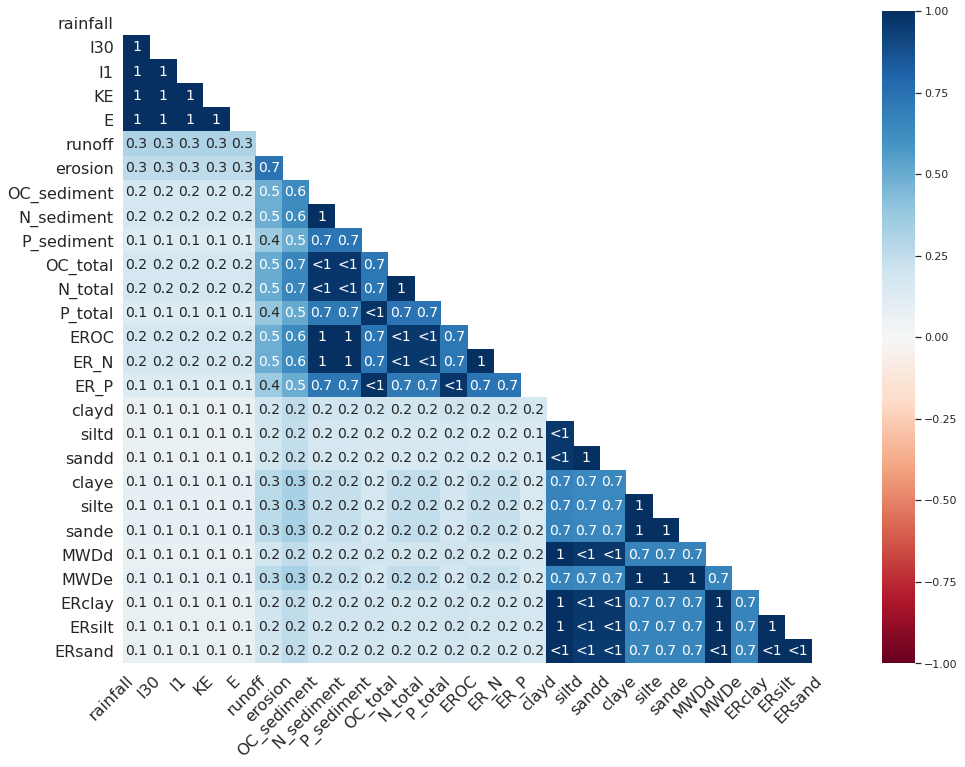

In [ ]:
import missingno as mnso
mnso.heatmap(df, figsize=(16,12))
plt.show()

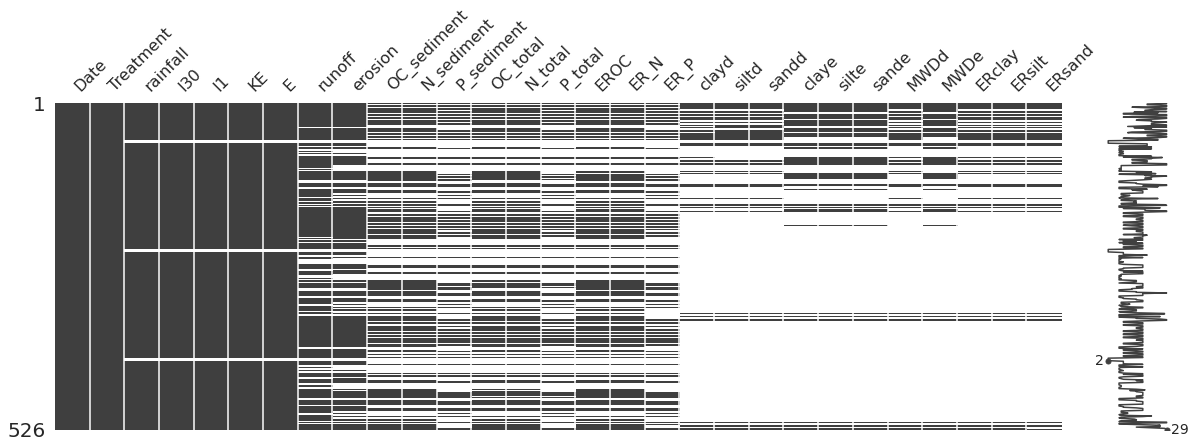

In [ ]:
mno.matrix(df, figsize = (20, 6))

In [ ]:
df = df[df['rainfall'].notna()]

In [ ]:
df.shape

(511, 29)

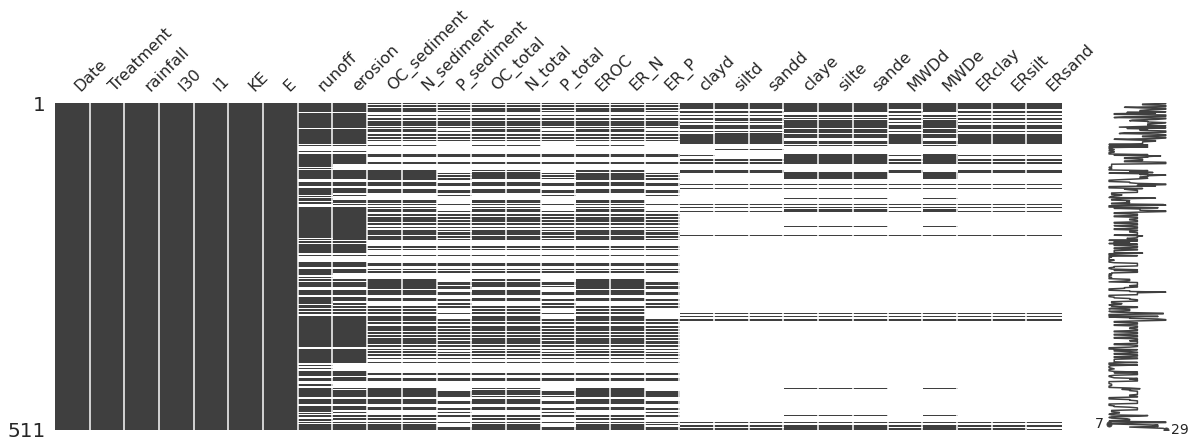

In [ ]:
mno.matrix(df, figsize = (20, 6))

In [ ]:
col=list(df.columns)

In [ ]:
col.remove('Date')
col.remove('ERsand')
col.remove('ERsilt')
col.remove('ERclay')
col.remove('MWDe')
col.remove('MWDd')
col.remove('sande')
col.remove('silte')
col.remove('claye')
col.remove('sandd')
col.remove('siltd')
col.remove('clayd')
col.remove('ER_P')
col.remove('ER_N')
col.remove('EROC')

In [ ]:
new_df=df[col]

In [ ]:
new_df.head()

,Treatment,rainfall,I30,I1,KE,E,runoff,erosion,OC_sediment,N_sediment,P_sediment,OC_total,N_total,P_total
0,Almond monocrop with intense tillage,20.2,4.4,3.6,0.17,0.74,0.10,0.04,2.05,0.19,28.64,0.00,0.0,0.00
1,Almond monocrop with reduced tillage,20.2,4.4,3.6,0.17,0.74,0.14,0.11,NaN,NaN,NaN,NaN,NaN,NaN
2,Almond intercropped with Avena sativa and Vici...,20.2,4.4,3.6,0.17,0.74,0.40,0.54,NaN,NaN,NaN,NaN,NaN,NaN
3,Cereal intensive tillage,20.2,4.4,3.6,0.17,0.74,0.39,0.87,0.68,0.07,18.24,0.01,0.0,0.02
4,Cereal reduced tillage,20.2,4.4,3.6,0.17,0.74,0.50,0.81,1.90,0.19,12.73,0.02,0.0,0.01


# Encoding

In [ ]:
new_df['Treatment'].value_counts()

Almond monocrop with intense tillage                                           103
Cereal intensive tillage                                                       102
Cereal reduced tillage                                                         102
Almond intercropped with Avena sativa and Vicia sativa with reduced tillage    102
Almond monocrop with reduced tillage                                           102
Name: Treatment, dtype: int64

In [ ]:
def handle_non_numerical_data(df):
    columns = df.columns

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

new_df=handle_non_numerical_data(new_df)

In [ ]:
almond_intense_df=df.loc[df['Treatment']=='Almond monocrop with intense tillage']
almond_reduced_df=df.loc[df['Treatment']=='Almond monocrop with reduced tillage']
almond_intercrop_df=df.loc[df['Treatment']=='Almond intercropped with Avena sativa and Vicia sativa with reduced tillage']
Cereal_reduced_df=df.loc[df['Treatment']=='Cereal reduced tillage']
Cereal_intense_df=df.loc[df['Treatment']=='Cereal intensive tillage']

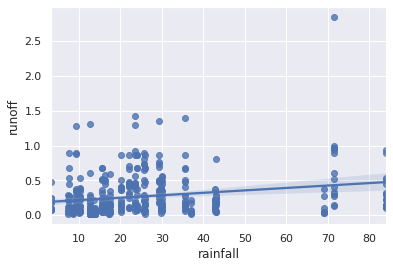

In [ ]:
sns.regplot(x='rainfall', y='runoff', data=df)

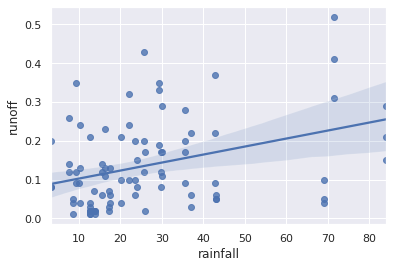

In [ ]:
sns.regplot(x='rainfall', y='runoff', data=almond_intense_df)

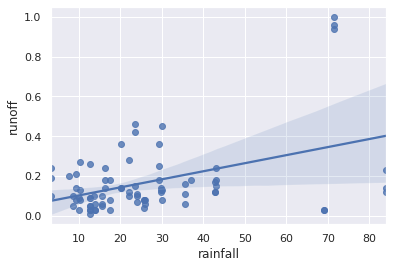

In [ ]:
sns.regplot(x='rainfall', y='runoff', data=almond_reduced_df)

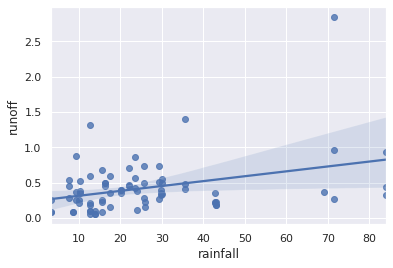

In [ ]:
sns.regplot(x='rainfall', y='runoff', data=almond_intercrop_df)

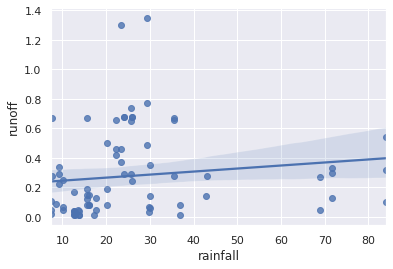

In [ ]:
sns.regplot(x='rainfall', y='runoff', data=Cereal_reduced_df)

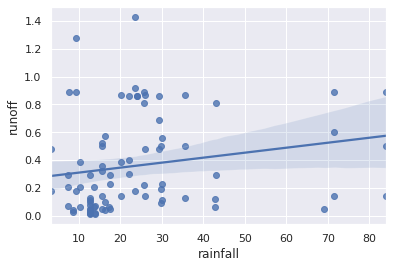

In [ ]:
sns.regplot(x='rainfall', y='runoff', data=Cereal_intense_df)

In [ ]:
missing_columns = ['Treatment', 'rainfall', 'I30', 'I1', 'KE', 'E', 'runoff', 'erosion']

# Random Imputation

In [ ]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [ ]:
for feature in missing_columns:
    new_df[feature + '_imp'] = new_df[feature]
    new_df = random_imputation(new_df, feature)

In [ ]:
new_df=new_df[['Treatment', 'rainfall', 'I30', 'I1', 'KE', 'E', 'runoff', 'erosion', 'Treatment_imp', 'rainfall_imp', 'I30_imp', 'I1_imp', 'KE_imp', 'E_imp', 'runoff_imp', 'erosion_imp']]

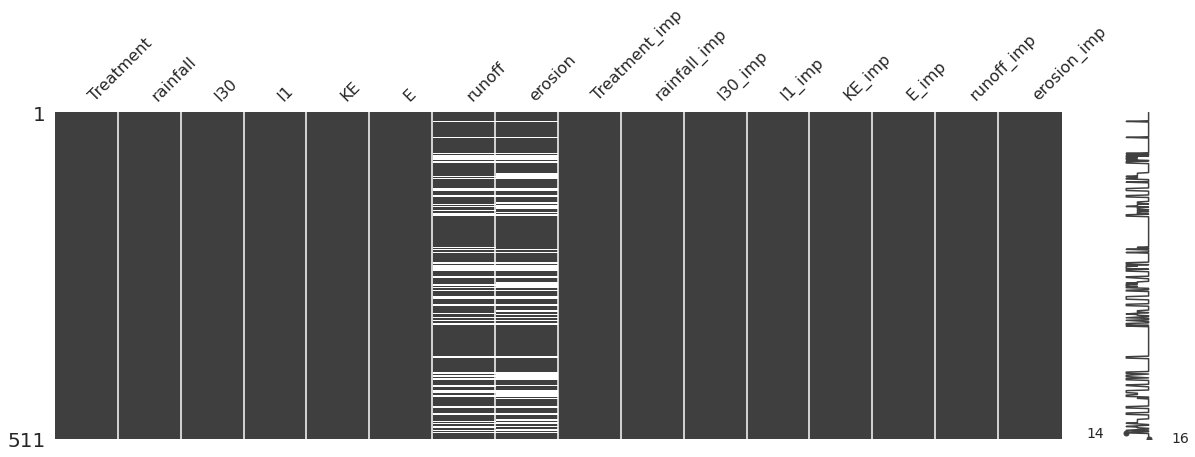

In [ ]:
mno.matrix(new_df, figsize = (20,6))

# Impute Missing data using Linear regression

In [ ]:
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = new_df[feature + "_imp"]
    parameters = list(set(new_df.columns) - set(missing_columns) - {feature + '_imp'})
    
    #Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = new_df[parameters], y = new_df[feature + '_imp'])
    
    deter_data.loc[new_df[feature].isnull(), "Det" + feature] = model.predict(new_df[parameters])[new_df[feature].isnull()]

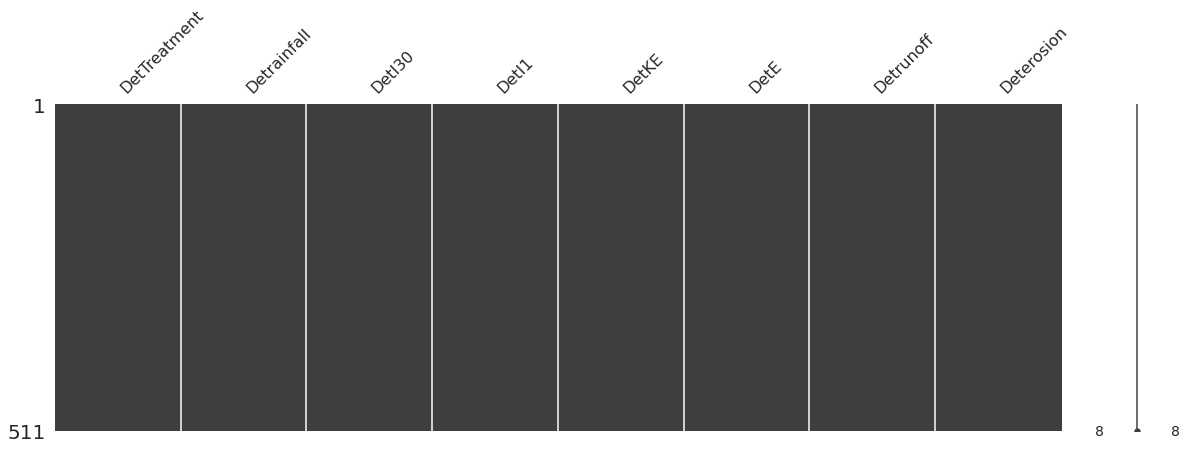

In [ ]:
mno.matrix(deter_data, figsize = (20,6))

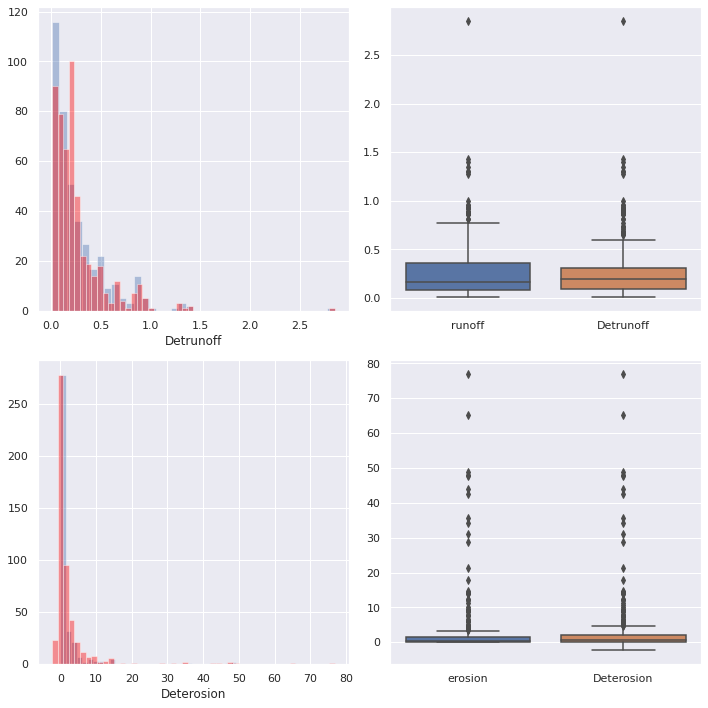

In [ ]:
sns.set()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(10, 10)

for index, variable in enumerate(["runoff", "erosion"]):
    sns.distplot(new_df[variable].dropna(), kde = False, ax = axes[index, 0])
    sns.distplot(deter_data["Det" + variable], kde = False, ax = axes[index, 0], color = 'red')

    sns.boxplot(data = pd.concat([new_df[variable], deter_data["Det" + variable]], axis = 1),
                ax = axes[index, 1])
    
plt.tight_layout()

In [ ]:
pd.concat([df[["runoff", "erosion"]], deter_data[["Detrunoff", "Deterosion"]]], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
runoff,404.0,0.270396,0.297556,0.010000,0.08,0.170000,0.360000,2.85
erosion,370.0,2.839595,8.393111,0.010000,0.18,0.475000,1.485000,76.90
Detrunoff,511.0,0.260232,0.269413,0.010000,0.09,0.193093,0.304685,2.85
Deterosion,511.0,2.511626,7.315745,-2.355401,0.16,0.540000,2.002985,76.90


In [ ]:
deter_data.describe()

,DetTreatment,Detrainfall,DetI30,DetI1,DetKE,DetE,Detrunoff,Deterosion
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,2.001957,24.454501,16.753151,9.990900,0.194755,3.677808,0.260232,2.511626
std,1.414905,18.679535,15.405966,9.059736,0.027807,3.977337,0.269413,7.315745
min,0.000000,3.300000,2.790000,2.200000,0.150000,0.420000,0.010000,-2.355401
25%,1.000000,12.750000,7.420000,4.800000,0.180000,1.360000,0.090000,0.160000
50%,2.000000,17.600000,10.000000,6.000000,0.190000,1.870000,0.193093,0.540000
75%,3.000000,29.800000,17.200000,12.000000,0.210000,3.670000,0.304685,2.002985
max,4.000000,84.000000,60.000000,37.610000,0.260000,15.280000,2.850000,76.900000


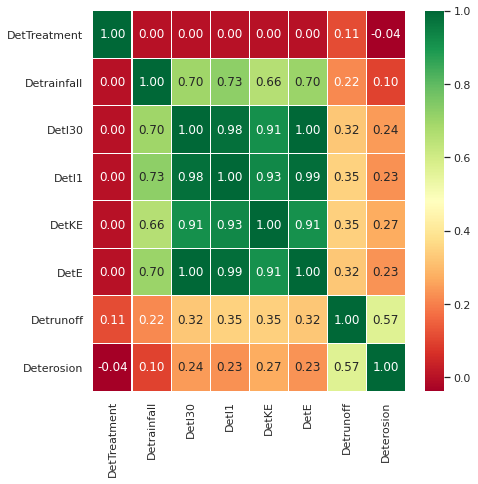

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(deter_data.corr(), annot=True, cmap='RdYlGn',linewidths=0.1,fmt='.2f')

In [ ]:
res_df=deter_data
res_df.columns=['Treatment', 'rainfall', 'I30', 'I1', 'KE', 'E', 'runoff', 'erosion']
res_df.shape

(511, 8)

In [ ]:
res_df.head()

,Treatment,rainfall,I30,I1,KE,E,runoff,erosion
0,3.0,20.2,4.4,3.6,0.17,0.74,0.10,0.04
1,1.0,20.2,4.4,3.6,0.17,0.74,0.14,0.11
2,4.0,20.2,4.4,3.6,0.17,0.74,0.40,0.54
3,2.0,20.2,4.4,3.6,0.17,0.74,0.39,0.87
4,0.0,20.2,4.4,3.6,0.17,0.74,0.50,0.81


In [ ]:
print('Skewness: ')
print(res_df.skew())

Skewness: 
Treatment   -0.003471
rainfall     1.705219
I30          1.604690
I1           1.827839
KE           0.633209
E            1.760606
runoff       3.190196
erosion      6.090339
dtype: float64


In [ ]:
col=res_df.columns
new_df=res_df

# Scaling, Train-Test Split

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
new_df=pd.DataFrame(scaler.fit_transform(res_df[col]))
new_df.columns=col

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns=['runoff'], axis=1), new_df['runoff'], test_size=0.1, random_state=100)

# Grid Search and Cross Validation
![alt text](https://lh3.googleusercontent.com/proxy/3AZnX9RObxa-afRWQmeT6xxQ1AJHrsL4wJQJAu1vyUS9nuf1aLaSHe4KCak0X164vPQuC3yoACwTEqDRxBAPs7v-0GOqPhGYhR7MXHNn5VGfzO8i6ZGd6gIyS7Y-iCU9pY-nrCaqDHAZ)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, KFold

# Metrics

![alt text](https://cdn-media-1.freecodecamp.org/images/hmZydSW9YegiMVPWq2JBpOpai3CejzQpGkNG)

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRHCpZk73rMrlgFID0msdFD7-eT-1h9WbbSOw&usqp=CAU)


# Ridge Regression

![alt text](https://i.stack.imgur.com/s71QZ.png)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import model_selection as ms
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold

kf = KFold(n_splits=15,shuffle = True, random_state=100)
parameters= {'alpha':[0.0001,0.0009,0.001,0.01,0.1,1,10],
            'max_iter':[100,500,1000, 50, 20, 2000]
             }


#lr = LinearRegression()

rr = Ridge()
rr_model = ms.GridSearchCV(rr, param_grid=parameters, cv=10)
rr_model.fit(X_train, y_train)

print('The best value of Alpha is: ', rr_model.best_params_)

The best value of Alpha is:  {'alpha': 0.1, 'max_iter': 100}


In [ ]:
rr_pred = rr_model.predict(X_test)
#lss_pred=lss_pred.reshape(-1,1)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, rr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rr_pred)))

MAE: 0.051992115549912246
MSE: 0.007024573627705062
RMSE: 0.08381272950873908


In [ ]:
check=pd.DataFrame(data=[rr_pred,y_test])
check

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,0.062124,0.061625,0.053187,0.084080,0.076721,0.141024,0.163037,0.065410,0.202020,0.142376,0.058386,0.119043,0.139539,0.075111,0.074688,0.065524,0.091658,0.077112,0.117046,0.042784,0.086493,0.100329,0.055736,0.173424,0.238377,0.028741,0.037548,0.089306,0.047600,0.099629,0.072554,0.142251,0.091771,0.090315,0.049014,0.068340,0.054167,0.069672,0.079351,0.074987,0.061625,0.061707,0.064869,0.127129,0.054119,0.078535,0.039501,0.075168,0.065803,0.055849,0.060187,0.046158
1,0.080986,0.154930,0.133803,0.038732,0.035211,0.059859,0.267606,0.007042,0.091549,0.102113,0.049296,0.059859,0.471831,0.098592,0.235915,0.010563,0.112676,0.066260,0.140845,0.069261,0.052817,0.077466,0.038732,0.102113,0.281690,0.000000,0.028169,0.091549,0.003521,0.067116,0.144366,0.489437,0.068797,0.064881,0.010563,0.133803,0.031690,0.077465,0.074905,0.052817,0.042254,0.072455,0.065134,0.038732,0.038732,0.014085,0.070290,0.038732,0.007042,0.068336,0.044403,0.066690


In [ ]:
pip install pyplotlib

ERROR: Could not find a version that satisfies the requirement pyplotlib (from versions: none)
ERROR: No matching distribution found for pyplotlib


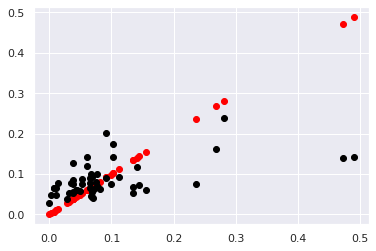

In [ ]:
#import pyplotlib.pyplot as py
plt.scatter(y_test, y_test, color='red')
plt.scatter(y_test, rr_pred, color='black')
plt.show()

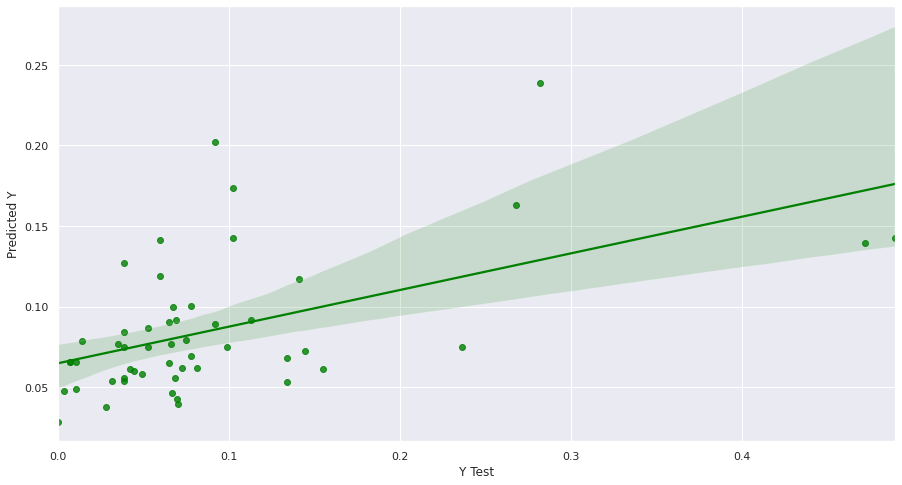

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=rr_pred, color='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Decision tree regressor

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png)

In [ ]:
from sklearn import tree

kf = KFold(n_splits=15,shuffle = True, random_state=100)
parameters= {'criterion':["mse", "friedman_mse", "mae"],
            'max_depth':[5, 10, 25, 50, 75, 100, 150]
             }

dt=tree.DecisionTreeRegressor()
dt_model = ms.GridSearchCV(dt, param_grid=parameters, cv=10) #Hyperparameter Tuning
dt_model.fit(X_train, y_train)

print('The criterion and depth are : ',dt_model.best_params_)

The criterion and depth are :  {'criterion': 'mse', 'max_depth': 5}


In [ ]:
dtr_pred = dt_model.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 0.04857803869761202
MSE: 0.004966805964278813
RMSE: 0.0704755699819364


In [ ]:
check=pd.DataFrame(data=[dtr_pred,y_test])
check

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,0.125170,0.028814,0.125170,0.050446,0.091368,0.142788,0.289613,0.091368,0.216685,0.142788,0.142788,0.125170,0.289613,0.093940,0.091368,0.050446,0.142788,0.091368,0.216685,0.093940,0.028814,0.091368,0.050446,0.142788,0.289613,0.028814,0.028814,0.216685,0.050446,0.058262,0.028814,0.216685,0.091368,0.058262,0.028814,0.125170,0.028814,0.050446,0.066418,0.091368,0.028814,0.028814,0.028814,0.070423,0.070423,0.066418,0.028814,0.091368,0.050446,0.058262,0.058262,0.028814
1,0.080986,0.154930,0.133803,0.038732,0.035211,0.059859,0.267606,0.007042,0.091549,0.102113,0.049296,0.059859,0.471831,0.098592,0.235915,0.010563,0.112676,0.066260,0.140845,0.069261,0.052817,0.077466,0.038732,0.102113,0.281690,0.000000,0.028169,0.091549,0.003521,0.067116,0.144366,0.489437,0.068797,0.064881,0.010563,0.133803,0.031690,0.077465,0.074905,0.052817,0.042254,0.072455,0.065134,0.038732,0.038732,0.014085,0.070290,0.038732,0.007042,0.068336,0.044403,0.066690


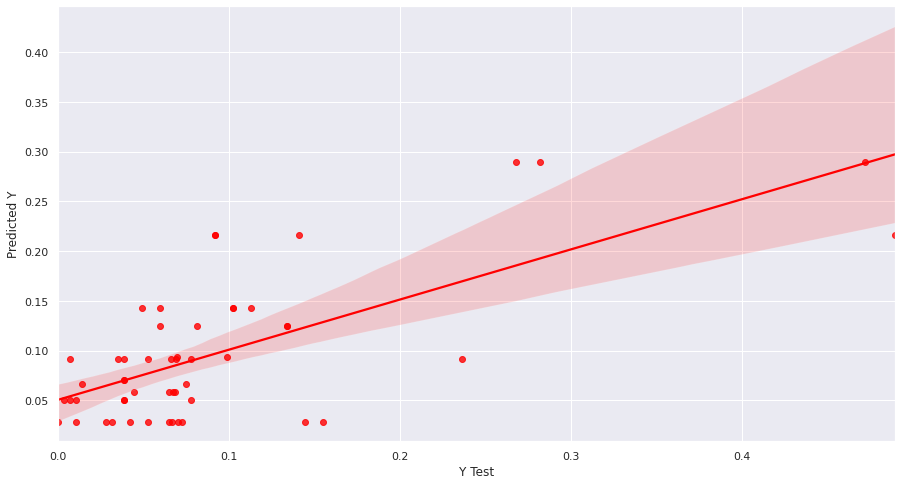

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=dtr_pred, color='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

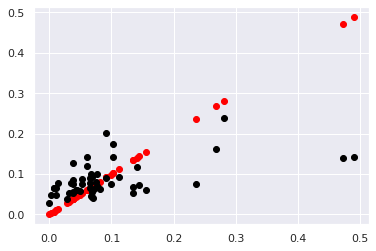

In [ ]:
#import pyplotlib.pyplot as py
plt.scatter(y_test, y_test, color='red')
plt.scatter(y_test, rr_pred, color='black')
plt.show()

# Support Vector Regressor

![alt text](https://miro.medium.com/max/667/1*CgDvkD7OtXVhOScMpyMKsw.png)

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_pred = svr.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

MAE: 0.07231439288473863
MSE: 0.008186152752273666
RMSE: 0.09047736044046414


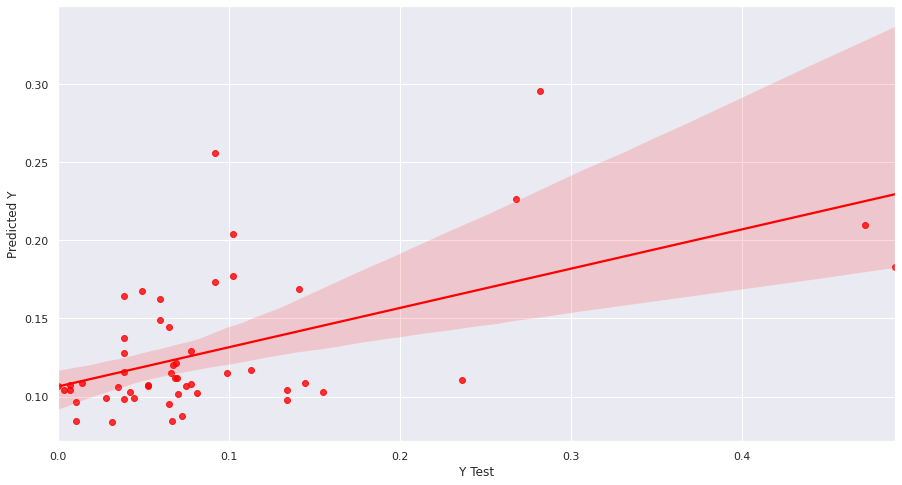

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=svr_pred, color='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Random Forest Regressor

![alt text](https://miro.medium.com/max/2612/0*f_qQPFpdofWGLQqc.png)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 0.06018252874197499
MSE: 0.0072638564068874855
RMSE: 0.08522826061165091


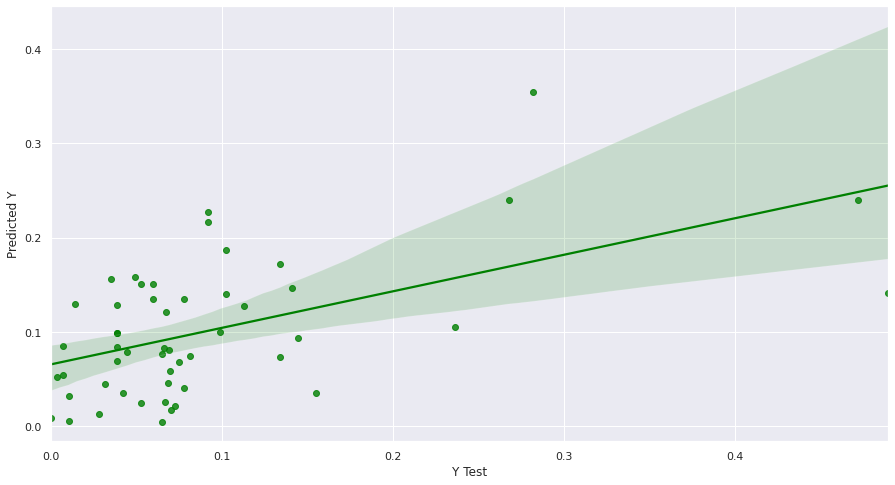

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=rfr_pred, color='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

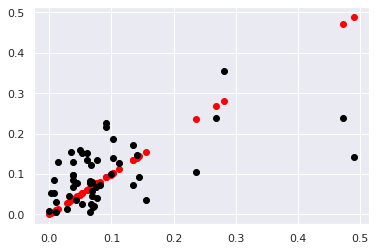

In [ ]:
#import pyplotlib.pyplot as py
plt.scatter(y_test, y_test, color='red')
plt.scatter(y_test, rfr_pred, color='black')
plt.show()

In [ ]:
col=res_df.columns

new_df=pd.DataFrame(scaler.fit_transform(res_df[col]))
new_df.columns=col
new_df.shape

(511, 8)

# Outlier Removal by isolation forest

![alt text](https://www.mdpi.com/remotesensing/remotesensing-12-01678/article_deploy/html/images/remotesensing-12-01678-g003.png)

In [ ]:
from sklearn.ensemble import IsolationForest

iso=IsolationForest(contamination=0.1)
yhat=iso.fit_predict(new_df)

In [ ]:
iso

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [ ]:
mask = yhat != -1

In [ ]:
mask.shape

(511,)

In [ ]:
new_df=new_df.iloc[mask,:]

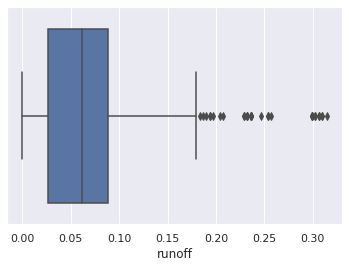

In [ ]:
sns.boxplot(new_df['runoff'])
plt.show()

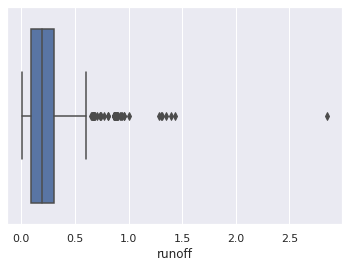

In [ ]:
sns.boxplot(res_df['runoff'])
plt.show()

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(new_df.drop(columns=['runoff'], axis=1), new_df['runoff'], test_size=0.1, random_state=100)

In [ ]:
xtrain.shape, new_df.shape

((414, 7), (460, 8))

# DT Regressor

In [ ]:
kf = KFold(n_splits=15,shuffle = True, random_state=100)
parameters= {'criterion':["mse", "friedman_mse", "mae"],
            'max_depth':[5, 10, 25, 50, 75, 100, 150]
             }

dt=tree.DecisionTreeRegressor()
model = ms.GridSearchCV(dt, param_grid=parameters, cv=10)
model.fit(xtrain, ytrain)

print('The criterion and depth are : ',dt_model.best_params_)

The criterion and depth are :  {'criterion': 'mse', 'max_depth': 5}


In [ ]:
yhat = model.predict(xtest)
#yhat = yhat.reshape(-1,1)

In [ ]:
print('MAE:', metrics.mean_absolute_error(ytest, yhat))
print('MSE:', metrics.mean_squared_error(ytest, yhat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, yhat)))

MAE: 0.030567725862018662
MSE: 0.0015984771570823019
RMSE: 0.039980959931976395


In [ ]:
check=pd.DataFrame(data=[yhat,ytest])
check

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0.040034,0.028169,0.135013,0.040034,0.079644,0.079644,0.063738,0.056338,0.028169,0.038173,0.019945,0.107647,0.135013,0.058392,0.071596,0.019945,0.079644,0.051801,0.058392,0.058392,0.107647,0.019945,0.077465,0.170775,0.121479,0.038173,0.107647,0.019945,0.040034,0.019945,0.121479,0.019945,0.019945,0.019945,0.028169,0.051801,0.129940,0.019945,0.040034,0.079644,0.079644,0.040034,0.040034,0.038173,0.121479,0.040034
1,0.017606,0.074905,0.045775,0.014085,0.061359,0.066260,0.063380,0.109155,0.014085,0.038732,0.003521,0.070400,0.228873,0.024648,0.010563,0.017606,0.064469,0.007042,0.010563,0.045775,0.032022,0.000000,0.084507,0.137324,0.106977,0.035211,0.070423,0.024648,0.068095,0.021127,0.049296,0.003521,0.065134,0.000000,0.014085,0.024648,0.071466,0.035211,0.035211,0.123239,0.068554,0.144366,0.007042,0.045775,0.169014,0.028169


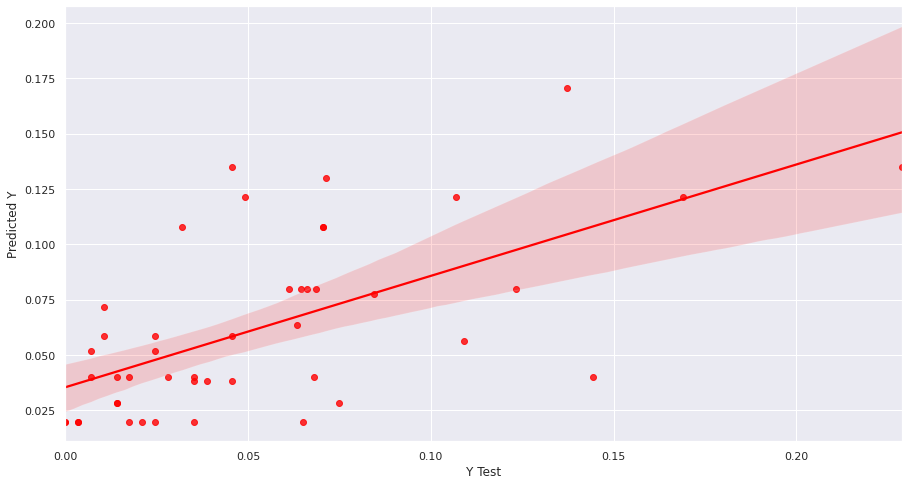

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=ytest, y=yhat, color='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

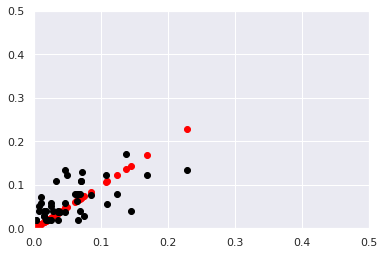

In [ ]:
plt.scatter(ytest, ytest, color='red')
plt.scatter(ytest, yhat, color='black')
plt.xlim(0,0.5)
plt.ylim(0,0.5)
plt.show()

# RF Regressor

In [ ]:
kf = KFold(n_splits=15,shuffle = True, random_state=100)
parameters= {'criterion':["mse", "friedman_mse", "mae"],
            'n_estimators':[5, 10, 25, 50, 75, 100, 150]
             }

rfr=RandomForestRegressor()
model = ms.GridSearchCV(rfr, param_grid=parameters, cv=10)
model.fit(xtrain, ytrain)

print('The criterion and estimators are : ',model.best_params_)

The criterion and estimators are :  {'criterion': 'mae', 'n_estimators': 150}


In [ ]:
yhat = model.predict(xtest)

In [ ]:
print('MAE:', metrics.mean_absolute_error(ytest, yhat))
print('MSE:', metrics.mean_squared_error(ytest, yhat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, yhat)))

MAE: 0.030987430144411375
MSE: 0.0015944268395543444
RMSE: 0.03993027472425333


In [ ]:
check=pd.DataFrame(data=[yhat,ytest])
check

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0.038399,0.086287,0.143004,0.023042,0.061683,0.084306,0.058782,0.083880,0.087170,0.042890,0.008120,0.1394,0.121944,0.064167,0.055854,0.030464,0.077810,0.051209,0.076953,0.105121,0.087309,0.010598,0.122468,0.125823,0.122875,0.042733,0.099096,0.037896,0.034190,0.036093,0.112941,0.013218,0.016187,0.010107,0.065925,0.034479,0.088693,0.015879,0.050625,0.090303,0.095356,0.084742,0.039610,0.048876,0.123093,0.051752
1,0.017606,0.074905,0.045775,0.014085,0.061359,0.066260,0.063380,0.109155,0.014085,0.038732,0.003521,0.0704,0.228873,0.024648,0.010563,0.017606,0.064469,0.007042,0.010563,0.045775,0.032022,0.000000,0.084507,0.137324,0.106977,0.035211,0.070423,0.024648,0.068095,0.021127,0.049296,0.003521,0.065134,0.000000,0.014085,0.024648,0.071466,0.035211,0.035211,0.123239,0.068554,0.144366,0.007042,0.045775,0.169014,0.028169


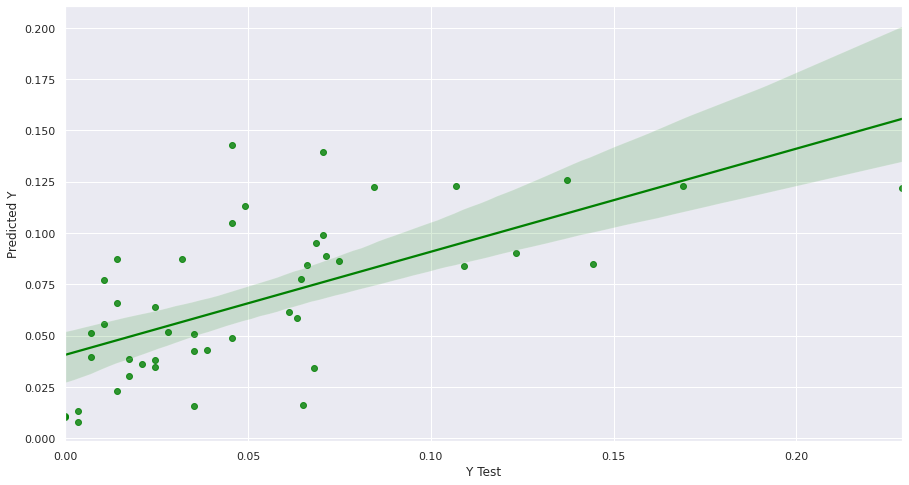

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=ytest, y=yhat, color='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

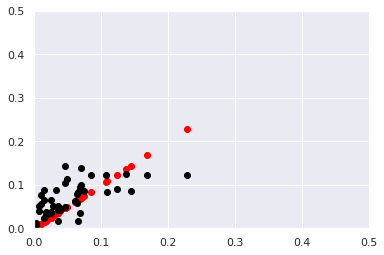

In [ ]:
plt.scatter(ytest, ytest, color='red')
plt.scatter(ytest, yhat, color='black')
plt.xlim(0,0.5)
plt.ylim(0,0.5)
plt.show()

# Ridge

In [ ]:
kf = KFold(n_splits=15,shuffle = True, random_state=100)
parameters= {'alpha':[0.0001,0.0009,0.001,0.01,0.1,1,10],
            'max_iter':[100,500,1000, 50, 20, 2000]
             }


#lr = LinearRegression()

rr = Ridge()
rr_model = ms.GridSearchCV(rr, param_grid=parameters, cv=10)
rr_model.fit(xtrain, ytrain)

print('The best value of Alpha is: ', rr_model.best_params_)

The best value of Alpha is:  {'alpha': 0.01, 'max_iter': 100}


In [ ]:
yhat = rr_model.predict(xtest)
#lss_pred=lss_pred.reshape(-1,1)

In [ ]:
print('MAE:', metrics.mean_absolute_error(ytest, yhat))
print('MSE:', metrics.mean_squared_error(ytest, yhat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, yhat)))

MAE: 0.038440298437349106
MSE: 0.002094700331892733
RMSE: 0.045767896301804535


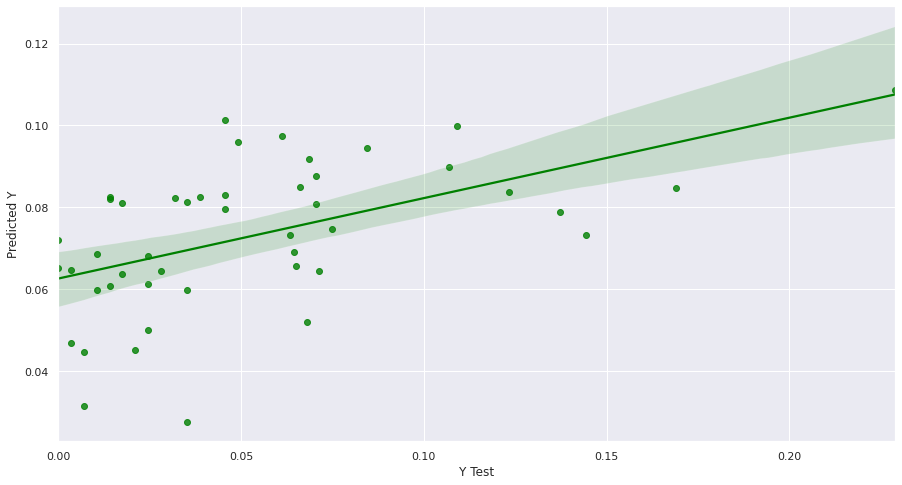

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=ytest, y=yhat, color='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

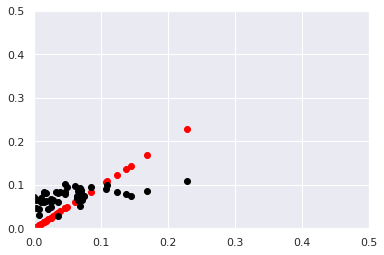

In [ ]:
plt.scatter(ytest, ytest, color='red')
plt.scatter(ytest, yhat, color='black')
plt.xlim(0,0.5)
plt.ylim(0,0.5)
plt.show()

# SVR

In [ ]:
svr = SVR(kernel = 'rbf')
svr.fit(xtrain, ytrain)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
yhat = rr_model.predict(xtest)

In [ ]:
print('MAE:', metrics.mean_absolute_error(ytest, yhat))
print('MSE:', metrics.mean_squared_error(ytest, yhat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, yhat)))

MAE: 0.038440298437349106
MSE: 0.002094700331892733
RMSE: 0.045767896301804535


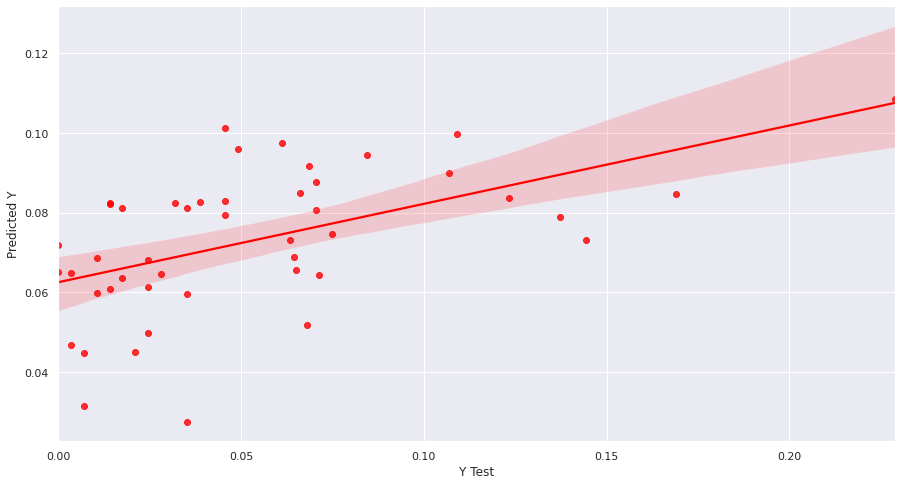

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=ytest, y=yhat, color='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

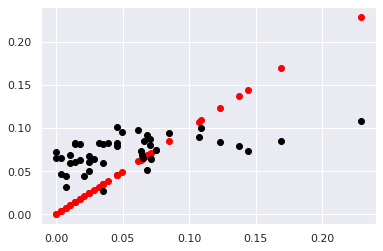

In [ ]:
plt.scatter(ytest, ytest, color='red')
plt.scatter(ytest, yhat, color='black')
plt.show()